## Week 1##

Here, we produce histograms showing the average temperatures for a given time period in different areas

### Using Xarray to import ###

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
sns.set()

In [1]:
import xarray as xr
path = 'data/riskindex/netcdf/max_temperature/'

In [2]:
#load 'observed' temperatures for LONDON
data_era = xr.open_dataarray(path + 'London_ERAI.nc')
data_era

<xarray.DataArray 'MX2T' (time: 13870)>
array([273.09656, 273.35147, 283.5008 , ..., 280.2819 , 284.54987, 285.18195],
      dtype=float32)
Coordinates:
    day_of_year  (time) int64 ...
    surface      float32 ...
    year         (time) int64 ...
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2017-12-31
    lon          float64 ...
    lat          float64 ...
Attributes:
    long_name:     Maximum 2 metre temperature since previous post-processing
    units:         K
    cell_methods:  day_of_year: year: maximum
    city:          London
    rcp:           None
    model_type:    era

In [6]:
# Load climate model temperature
data_gcm = xr.open_dataarray(path + 'London_rcp45.nc')
data_gcm

<xarray.DataArray (time: 25915)>
array([283.577637, 280.271443, 279.143461, ..., 279.336669, 278.550096,
       283.045349])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2050-12-31
    lon      float64 ...
    lat      float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Maximum Near-Surface Air Temperature
    units:          K
    original_name:  mo: m01s03i236
    cell_methods:   time: maximum
    cell_measures:  area: areacella
    city:           London
    rcp:            rcp45
    model_type:     gcm

### Converting to pandas dataframe ### 

In [7]:
from downloader import dataprocessing
#ERA-Interim
df_era = dataprocessing.da_to_df(data_era)
df_era.head()

,data
time,
1980-01-01,273.096558
1980-01-02,273.351471
1980-01-03,283.500793
1980-01-04,283.673218
1980-01-05,279.352417


In [8]:
# GCM
df_gcm = dataprocessing.da_to_df(data_gcm)

df_gcm['temp_celcius'] = df_gcm['data'] - 273
df_gcm

,data,temp_celcius
time,,
1980-01-01,283.577637,10.577637
1980-01-02,280.271443,7.271443
1980-01-03,279.143461,6.143461
1980-01-04,285.184903,12.184903
1980-01-05,281.610492,8.610492
...,...,...
2050-12-27,283.919664,10.919664
2050-12-28,279.696327,6.696327
2050-12-29,279.336669,6.336669


(array([   2.,   13.,   41.,  144.,  377.,  691.,  958., 1328., 1599.,
        1480., 1306., 1441., 1436., 1263.,  872.,  562.,  233.,   92.,
          25.,    7.]),
 array([267.0666 , 268.9859 , 270.9052 , 272.82452, 274.74384, 276.66315,
        278.58243, 280.50174, 282.42105, 284.34036, 286.25967, 288.179  ,
        290.0983 , 292.0176 , 293.93692, 295.8562 , 297.7755 , 299.69482,
        301.61414, 303.53345, 305.45276], dtype=float32),
 <a list of 20 Patch objects>)

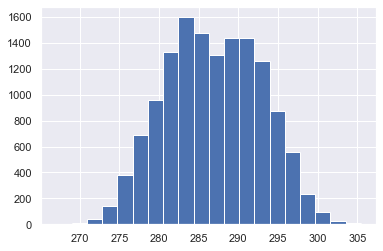

In [12]:
#a simple histogram for all the ERA data
plt.figure()
plt.hist(df_era['data'], label = 'ERA', bins=20)

c:\users\raghul\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


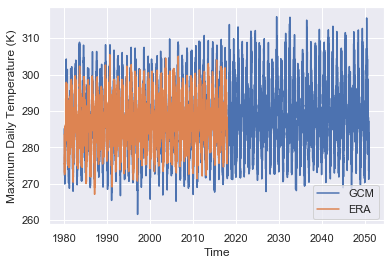

In [59]:
plt.figure()
plt.plot(df_gcm.index, df_gcm.data, label='GCM')
plt.plot(df_era.index, df_era.data, label='ERA')
plt.xlabel('Time')
plt.ylabel('Maximum Daily Temperature (K)')
plt.legend()
plt.show()

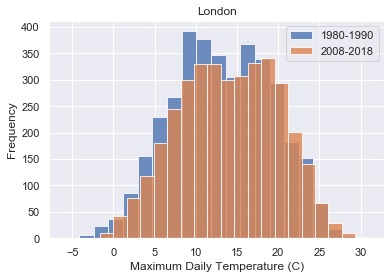

In [9]:
df_era['temp_celcius'] = df_era['data'] - 273
df_past = df_era['1980-01-01':'1990-01-01']
df_present = df_era['2007-12-31':'2017-12-31']


plt.figure()
plt.hist(df_past.temp_celcius, label = '1980-1990', bins=20, alpha = 0.8)
plt.hist(df_present.temp_celcius, label = '2008-2018', bins=20, alpha = 0.8)
plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (C)')
plt.title('London')
plt.legend()
plt.show()
#can copy code


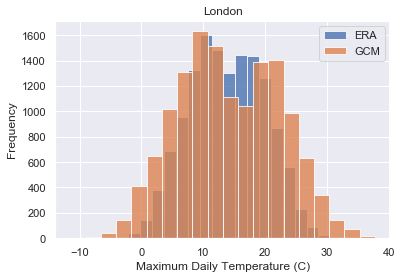

In [82]:
df_era = df_era['1980-01-01':'2017-12-31']
df_gcm = df_gcm['1980-01-01':'2017-12-31']


plt.figure()
plt.hist(df_era.temp_celcius, label = 'ERA', bins=20, alpha = 0.8)
plt.hist(df_gcm.temp_celcius, label = 'GCM', bins=20, alpha = 0.8)
plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (C)')
plt.title('London')
plt.legend()
plt.show()

### Bias correction using mean ###

In [14]:
#calculate the mean of all the observed data

mean_observed = df_era['temp_celcius'].mean()

#calculate the mean of the rcp45 data for the same period

gcm_ref = df_gcm.iloc[:len(df_era.index),:]

mean_gcm_ref = gcm_ref['temp_celcius'].mean()

#difference in temp

diff = mean_gcm_ref - mean_observed

df_gcm['corrected'] = df_gcm['temp_celcius'] - diff

diff

0.3722561185518707

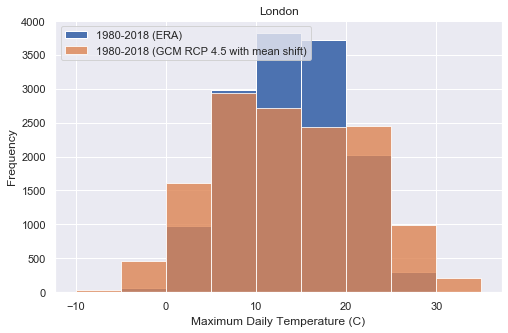

In [109]:
#test on the reference period
df_period1_era = df_era['1980-01-01':'2017-12-31']
df_period1_gcm = df_gcm['1980-01-01':'2017-12-31']


fig = plt.figure(figsize = (8,5))

mybins = np.arange(-10,40,5)
plt.hist(df_period1_era.temp_celcius, label = '1980-2018 (ERA)', alpha = 1, bins=mybins)
plt.hist(df_period1_gcm.corrected, label = '1980-2018 (GCM RCP 4.5 with mean shift)', alpha = 0.8, bins = mybins)
#plt.hist(df_period1_gcm.temp_celcius, label = '1980-2018 (uncorrected GCM)', alpha = 0.4, bins = mybins)


plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (C)')
plt.title('London')
plt.legend(loc = 'upper left')
plt.show()

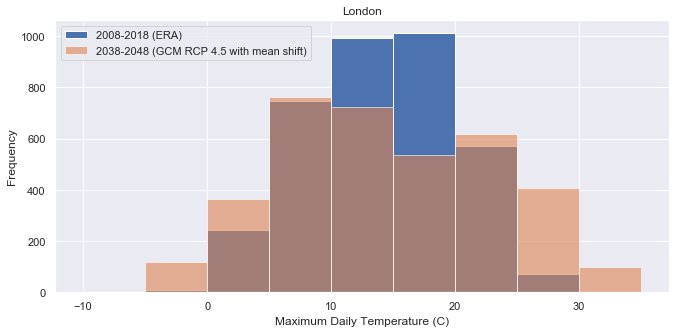

In [114]:
#look at the period 2018 - 2028 and compare to 2008 - 2018

df_period1_era = df_era['2008-01-01':'2017-12-31']
df_period1_gcm = df_gcm['2008-01-01':'2017-12-31']
df_period2_gcm = df_gcm['2018-01-01':'2027-12-31']
df_period3_gcm = df_gcm['2028-01-01':'2037-12-31']
df_period4_gcm = df_gcm['2038-01-01':'2047-12-31']


fig = plt.figure(figsize = (11,5))

mybins = np.arange(-10,40,5)
plt.hist(df_period1_era.temp_celcius, label = '2008-2018 (ERA)', alpha = 1, bins=mybins)
plt.hist(df_period1_gcm.corrected, label = '2038-2048 (GCM RCP 4.5 with mean shift)', alpha = 0.6, bins = mybins)

plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (C)')
plt.title('London')
plt.legend(loc = 'upper left')
plt.show()

Need to also correct for the differences in variance between the Obs

### Bias correction using mean and variance ###

In [15]:
gcm_ref = df_gcm.iloc[:len(df_era.index),:]

ratio = (gcm_ref['temp_celcius'].std())/(df_era['temp_celcius'].std())

df_gcm['corrected_variance'] = mean_observed + ratio*(df_gcm['temp_celcius'] - mean_gcm_ref)



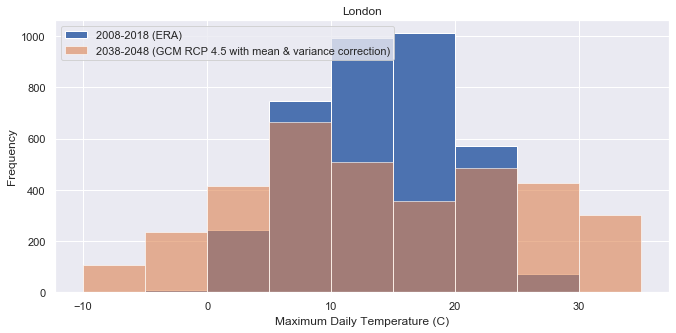

In [18]:
#look at the period 2018 - 2028 and compare to 2008 - 2018

df_period1_era = df_era['2008-01-01':'2017-12-31']
df_period1_gcm = df_gcm['2008-01-01':'2017-12-31']
df_period2_gcm = df_gcm['2018-01-01':'2027-12-31']
df_period3_gcm = df_gcm['2028-01-01':'2037-12-31']
df_period4_gcm = df_gcm['2038-01-01':'2047-12-31']


fig = plt.figure(figsize = (11,5))

mybins = np.arange(-10,40,5)
plt.hist(df_period1_era.temp_celcius, label = '2008-2018 (ERA)', alpha = 1, bins=mybins)
plt.hist(df_period1_gcm.corrected_variance, label = '2038-2048 (GCM RCP 4.5 with mean & variance correction)', alpha = 0.6, bins = mybins)

plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (C)')
plt.title('London')
plt.legend(loc = 'upper left')
plt.show()

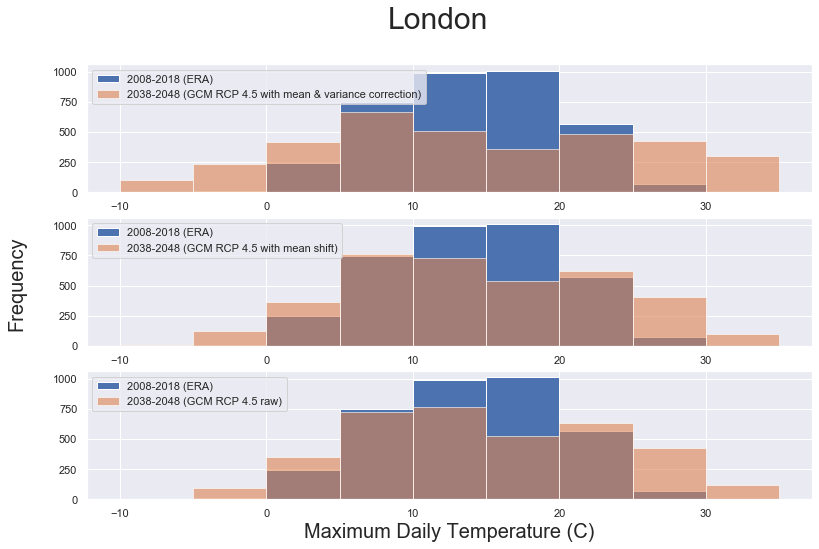

In [74]:
mybins = np.arange(-10,40,5)


fig, ax = plt.subplots(3,1,figsize = (13,8))

fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.xlabel('Maximum Daily Temperature (C)')
fig.suptitle('London', fontsize=30)



ax[0].hist(df_period1_era.temp_celcius, label = '2008-2018 (ERA)', alpha = 1, bins=mybins)
ax[0].hist(df_period1_gcm.corrected_variance, label = '2038-2048 (GCM RCP 4.5 with mean & variance correction)', alpha = 0.6, bins = mybins)
ax[0].legend(loc = 'upper left')



ax[1].hist(df_period1_era.temp_celcius, label = '2008-2018 (ERA)', alpha = 1, bins=mybins)
ax[1].hist(df_period1_gcm.corrected, label = '2038-2048 (GCM RCP 4.5 with mean shift)', alpha = 0.6, bins = mybins)
ax[1].legend(loc = 'upper left')

ax[2].hist(df_period1_era.temp_celcius, label = '2008-2018 (ERA)', alpha = 1, bins=mybins)
ax[2].hist(df_period1_gcm.temp_celcius, label = '2038-2048 (GCM RCP 4.5 raw)', alpha = 0.6, bins = mybins)
ax[2].legend(loc = 'upper left')

plt.rc('font', size=20)
plt.rc('axes', labelsize=20) 
plt.show()